# Example 1 : Convert any Image to its sketch

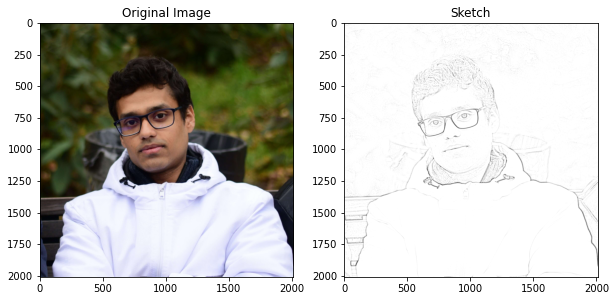

In [7]:
'''Change the path to any of your image in your PC'''

'''Here we are using the OpenCV library to perform the task. openCV is a very widely used image processing library 
generally used for a wide variety of computer vision tasks'''

import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

##change the path below to the image of your desire

input_image_path = r'C:\Users\Dell\Pictures\84661099_3368019799939419_366441601762852864_o-min_super.jpg'

image = cv.imread(input_image_path) ## read the input image using open cv

grey_img = cv.cvtColor(image, cv.COLOR_BGR2GRAY) ## convert RGB image to gray scale

invert = cv.bitwise_not(grey_img) ## invert the image to its opposite gray scale

blur = cv.GaussianBlur(invert, (21, 21), 0) ## this will reduce any present noise and hence will enhance the edges 

inv_blr = cv.bitwise_not(blur) ## will bring the image back to its original grayscale format with reduced noise

sketch = cv.divide(grey_img, inv_blr, scale=256.0) ## this will create the sketch by dividing

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(cv.cvtColor(cv.imread(input_image_path), cv.COLOR_BGR2RGB)), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(sketch, cmap='gray'), plt.title('Sketch')
#plt.subplot(1, 3, 3), plt.imshow(inv_blr, cmap='gray'), plt.title('inv')
plt.show()


# Example 2 : 
    Role a dice game : 
    
    Here you press y to keep rolling the dice unless and untill you get 1. If you get 1 your turn is over
    and next persons turn comes. 4 people can play this game turn by turn ad the person who reaches the score 50 1st WINS.
    If at any point of time you want to quit the game enter n isntead of y and the game terminates

In [9]:
import random


def roll():
    min_value = 1
    max_value = 6
    roll = random.randint(min_value, max_value)

    return roll


while True:
    players = input("Enter the number of players (2 - 4): ")
    if players.isdigit():
        players = int(players)
        if 2 <= players <= 4:
            break
        else:
            print("Must be between 2 - 4 players.")
    else:
        print("Invalid, try again.")

max_score = 50
player_scores = [0 for _ in range(players)]

while max(player_scores) < max_score:
    for player_idx in range(players):
        print("\nPlayer number", player_idx + 1, "turn has just started!")
        print("Your total score is:", player_scores[player_idx], "\n")
        current_score = 0
        #should_roll = 'empty'
        
        
            
        while True:
            should_roll = input("Would you like to roll enter y, quit enter n? ")
            if should_roll.lower() != "y": #and should_roll.lower() != "n":
                print('Please enter y to roll or n to quit the game')
                break
                
            #elif should_roll.lower() == "n":
            #    break

            value = roll()
            if value == 1:
                print("You rolled a 1! Turn done!")
                current_score = 0
                break
            else:
                current_score += value
                print("You rolled a:", value)

            print("Your score is:", current_score)

        player_scores[player_idx] += current_score
        print("Your total score is:", player_scores[player_idx])
        
        print('should_roll', should_roll)
        
        if should_roll.lower() == "n":
            break
    if should_roll.lower() == "n":
            break

max_score = max(player_scores)
winning_idx = player_scores.index(max_score)
print("Player number", winning_idx + 1,
      "is the winner with a score of:", max_score)

Enter the number of players (2 - 4): 2

Player number 1 turn has just started!
Your total score is: 0 

Would you like to roll enter y, quit enter n? y
You rolled a: 6
Your score is: 6
Would you like to roll enter y, quit enter n? y
You rolled a: 2
Your score is: 8
Would you like to roll enter y, quit enter n? y
You rolled a: 3
Your score is: 11
Would you like to roll enter y, quit enter n? y
You rolled a: 6
Your score is: 17
Would you like to roll enter y, quit enter n? y
You rolled a: 5
Your score is: 22
Would you like to roll enter y, quit enter n? y
You rolled a 1! Turn done!
Your total score is: 0
should_roll y

Player number 2 turn has just started!
Your total score is: 0 

Would you like to roll enter y, quit enter n? y
You rolled a 1! Turn done!
Your total score is: 0
should_roll y

Player number 1 turn has just started!
Your total score is: 0 

Would you like to roll enter y, quit enter n? y
You rolled a: 2
Your score is: 2
Would you like to roll enter y, quit enter n? y
You r

# Example 3: Web Scraping 
    We dynamic content from Indian stock exchange website directly intopandas dataframe.

In [10]:
from selenium import webdriver
from selenium import *
from selenium.webdriver.common.keys import Keys
import pandas as pd
import requests

chrome_options = webdriver.ChromeOptions()
prefs = {"profile.default_content_setting_values.notifications" : 2}
chrome_options.add_experimental_option("prefs", prefs)

driver = webdriver.Chrome(options=chrome_options,executable_path=r'C:\Users\Dell\Downloads\German A1_2\chromedriver-win32\chromedriver-win32\chromedriver.exe')

driver.get('https://www.nseindia.com/market-data/equity-derivatives-watch')

driver.implicitly_wait(10000)

'''Sometimes it is needed to go go the link above check for the correct x path and id of the table as it changes its 
name sometimes in that case you will get only nan values in the table'''

so = driver.find_element_by_xpath('(//*[@id="tableLiveMarket-equity-derivatives"])')

df = pd.read_html(so.get_attribute('outerHTML'))[0]

df

,InstrumentType,Symbol,Expiry Date,OptionType,Strike,LTP,Chng,%Chng,Open,High,Low,Volume(Contracts),Value*(₹ Crores),OpenInterest,Underlying Value
0,Index Options,MIDCPNIFTY,05-Feb-2024,Put,10750.0,8.80,-55.60,-86.34,48.70,119.70,2.55,13515544,1042.05,110315,10740.40
1,Index Options,MIDCPNIFTY,05-Feb-2024,Call,10800.0,0.05,-17.75,-99.72,19.85,49.05,0.05,10965027,884.06,119269,10740.40
2,Index Options,MIDCPNIFTY,05-Feb-2024,Put,10700.0,0.05,-39.40,-99.87,22.80,84.00,0.05,9431105,436.42,89672,10740.40
3,Index Options,MIDCPNIFTY,05-Feb-2024,Call,10775.0,0.05,-24.80,-99.80,26.25,66.50,0.05,9244239,777.21,120270,10740.40
4,Index Options,MIDCPNIFTY,05-Feb-2024,Put,10725.0,0.05,-50.55,-99.90,20.60,100.65,0.05,8483438,397.66,94586,10740.40
5,Index Options,MIDCPNIFTY,05-Feb-2024,Call,10750.0,0.05,-33.90,-99.85,35.00,86.45,0.05,7622974,916.47,91337,10740.40
6,Index Options,MIDCPNIFTY,05-Feb-2024,Put,10775.0,33.70,-46.75,-58.11,56.05,138.50,8.60,6832721,1003.39,40059,10740.40
7,Index Options,BANKNIFTY,07-Feb-2024,Call,46000.0,191.00,-205.35,-51.81,360.00,394.75,185.45,6768397,2946.89,197429,45825.55
8,Index Options,MIDCPNIFTY,05-Feb-2024,Call,10825.0,0.05,-12.40,-99.60,10.00,35.40,0.05,5670216,331.28,42467,10740.40
9,Index Options,MIDCPNIFTY,05-Feb-2024,Put,10675.0,0.05,-30.35,-99.84,18.00,69.25,0.05,5595335,205.63,28084,10740.40
